# S1: Importing data and dependencies:

In [1]:
!pip install sdv


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import shap
import socket
import matplotlib.pyplot as plt
from tqdm import tqdm

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [4]:
import seaborn as sns
import os
import gc
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [6]:
from sdv.single_table import CTGANSynthesizer
from sklearn.utils import resample

In [7]:
df = pd.read_csv('../data/raw/output.csv')

C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_42508\537082916.py:1: DtypeWarning: Columns (7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/output.csv')


In [8]:
df.describe()

,Unnamed: 0,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,flow_duration,fwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,is_attack
count,3.243188e+06,3.243188e+06,3.243188e+06,3243188.0,3.243188e+06,3.243188e+06,3.243188e+06,3.243188e+06,3.243188e+06,3.243188e+06,...,3243188.0,3243188.0,3243188.0,3243188.0,3243188.0,3.243188e+06,3.243188e+06,3.243188e+06,3.243188e+06,3.243188e+06
mean,1.621594e+06,3.634365e+04,2.211043e+04,0.0,4.403567e+00,3.486160e+02,1.493543e-01,6.706498e+00,4.452592e-01,1.112331e+01,...,0.0,0.0,0.0,0.0,0.0,3.683129e+03,3.532748e+03,5.405899e+02,1.587690e+02,7.635305e-01
std,9.362279e+05,1.887212e+04,2.108410e+04,0.0,2.652355e+01,1.760810e+03,3.857696e-01,2.646323e+01,1.291482e+00,7.712782e+01,...,0.0,0.0,0.0,0.0,0.0,1.417519e+04,1.453626e+04,2.117687e+03,1.433575e+03,4.249138e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.107968e+05,2.139575e+04,1.883000e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.621594e+06,3.932700e+04,1.513600e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2.432390e+06,5.248400e+04,4.029900e+04,0.0,1.000000e+00,6.100000e+01,0.000000e+00,0.000000e+00,2.160000e-04,3.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.024000e+03,0.000000e+00,5.120000e+02,0.000000e+00,1.000000e+00
max,3.243187e+06,6.553400e+04,6.553500e+04,0.0,2.950000e+02,1.711000e+04,1.200000e+01,1.312000e+03,4.999897e+00,2.448100e+04,...,0.0,0.0,0.0,0.0,0.0,6.553500e+04,6.553500e+04,6.553500e+04,6.516000e+04,1.000000e+00


In [9]:
df.isnull().sum()

Unnamed: 0              0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
                       ..
bwd_init_window_size    0
fwd_last_window_size    0
bwd_last_window_size    0
traffic                 0
is_attack               0
Length: 102, dtype: int64

In [10]:
df['traffic'].value_counts()

traffic
camoverflow     1640039
normal           766915
netscan          467093
rudeadyet        131081
apachekiller      84579
mqttmalaria       69623
slowloris         63608
arpspoofing       11236
slowread           9014
Name: count, dtype: int64

In [11]:
df.select_dtypes(include=['float64', 'int64']).columns.tolist()

['Unnamed: 0',
 'id.orig_p',
 'id.resp_p',
 'missed_bytes',
 'orig_pkts',
 'orig_ip_bytes',
 'resp_pkts',
 'resp_ip_bytes',
 'flow_duration',
 'fwd_pkts_tot',
 'bwd_pkts_tot',
 'fwd_data_pkts_tot',
 'bwd_data_pkts_tot',
 'fwd_pkts_per_sec',
 'bwd_pkts_per_sec',
 'flow_pkts_per_sec',
 'down_up_ratio',
 'fwd_header_size_tot',
 'fwd_header_size_min',
 'fwd_header_size_max',
 'bwd_header_size_tot',
 'bwd_header_size_min',
 'bwd_header_size_max',
 'flow_FIN_flag_count',
 'flow_SYN_flag_count',
 'flow_RST_flag_count',
 'fwd_PSH_flag_count',
 'bwd_PSH_flag_count',
 'flow_ACK_flag_count',
 'fwd_URG_flag_count',
 'bwd_URG_flag_count',
 'flow_CWR_flag_count',
 'flow_ECE_flag_count',
 'fwd_pkts_payload.min',
 'fwd_pkts_payload.max',
 'fwd_pkts_payload.tot',
 'fwd_pkts_payload.avg',
 'fwd_pkts_payload.std',
 'bwd_pkts_payload.min',
 'bwd_pkts_payload.max',
 'bwd_pkts_payload.tot',
 'bwd_pkts_payload.avg',
 'bwd_pkts_payload.std',
 'flow_pkts_payload.min',
 'flow_pkts_payload.max',
 'flow_pkts_payl

# S2: Missing data handling and feature imputation

In [12]:
mask = (df == '-').any()
print(mask[mask])

service           True
duration          True
orig_bytes        True
resp_bytes        True
history           True
tunnel_parents    True
dtype: bool


In [13]:
df.replace('-', np.nan, inplace=True)

C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_42508\32311047.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True)


In [14]:
missing = df.columns[df.isnull().any()].tolist()

In [15]:
df[missing].isnull().sum() * 100 / len(df)

service            87.569052
duration           61.243073
orig_bytes         61.243073
resp_bytes         61.243073
history            50.571906
tunnel_parents    100.000000
dtype: float64

In [16]:
for col in ['duration', 'orig_bytes', 'resp_bytes']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

In [17]:
if 'history' in df.columns:
    df['history'].fillna('unknown', inplace=True)

C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_42508\1566594358.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['history'].fillna('unknown', inplace=True)


In [18]:
df.drop(columns=['service', 'tunnel_parents'], inplace=True, errors='ignore')

In [19]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_42508\2907331251.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [20]:
df

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,0,10.10.10.252,48256,10.10.10.249,80,tcp,0.024381,13236.0,0.0,S0,...,0.0,0.0,0.0,0.0,64240,65160,501,440,apachekiller,1
1,1,10.10.10.252,48258,10.10.10.249,80,tcp,0.024080,13236.0,0.0,S0,...,0.0,0.0,0.0,0.0,64240,65160,501,440,apachekiller,1
2,2,10.10.10.252,48268,10.10.10.249,80,tcp,0.002000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,64240,65160,502,65160,apachekiller,1
3,3,10.10.10.252,48208,10.10.10.249,80,tcp,0.060782,13236.0,0.0,SH,...,0.0,0.0,0.0,0.0,64240,65160,501,501,apachekiller,1
4,4,10.10.10.252,48180,10.10.10.249,80,tcp,0.060774,13236.0,0.0,SH,...,0.0,0.0,0.0,0.0,64240,65160,501,501,apachekiller,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243183,3243183,10.10.10.252,33506,10.10.10.249,80,tcp,0.004861,279.0,0.0,SH,...,0.0,0.0,0.0,0.0,301,508,301,508,slowread,1
3243184,3243184,10.10.10.252,5353,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,64240,65160,501,508,slowread,1
3243185,3243185,10.10.10.252,42790,10.10.10.249,80,tcp,0.000000,0.0,0.0,OTH,...,0.0,0.0,0.0,0.0,512,0,512,0,slowread,1
3243186,3243186,10.10.10.252,39610,10.10.10.249,80,tcp,0.044895,0.0,0.0,OTH,...,0.0,0.0,0.0,0.0,1825,509,1825,509,slowread,1


In [21]:
LABEL = 'traffic'

In [22]:
SAMPLES = 20000

In [23]:
spoof_df = df[df[LABEL] == 'arpspoofing'].copy()

In [24]:
spoof_df.shape

(11236, 100)

In [25]:
gen_spoof = SAMPLES - len(spoof_df)

In [26]:
gen_spoof

8764

In [27]:
from sdv.metadata import Metadata

In [28]:
metadata = Metadata.detect_from_dataframe(
    data=spoof_df,
    table_name='spoofing_table')

In [29]:
ctgan1 = CTGANSynthesizer(metadata, epochs=50, verbose=True)

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\sdv\single_table\base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [30]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [31]:
len(num_cols)

92

In [32]:
cat_cols = [c for c in df.columns if c not in num_cols + [LABEL, 'label']]

In [33]:
cat_cols

['id.orig_h',
 'id.resp_h',
 'proto',
 'conn_state',
 'local_orig',
 'local_resp',
 'history']

In [34]:
# df = df.drop(columns = ['id.orig_h', 'id.resp_h'], axis = 1)

In [35]:
# df

In [36]:
categorical_cols = ['proto', 'conn_state', 'local_orig', 'local_resp', 'history']

for col in categorical_cols:
    df[col] = df[col].astype(str).fillna("unknown")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [37]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [38]:
cat_cols = [c for c in df.columns if c not in num_cols + [LABEL, 'label']]

In [39]:
len(num_cols)

97

In [40]:
len(cat_cols)

2

In [41]:
ctgan1.fit(spoof_df)

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\ctgan\synthesizers\_utils.py:16: FutureWarning: `cuda` parameter is deprecated and will be removed in a future release. Please use `enable_gpu` instead.
  warnings.warn(
Gen. (-6.37) | Discrim. (-1.75): 100%|██████████| 50/50 [01:51<00:00,  2.23s/it]


In [102]:
fig = ctgan1.get_loss_values_plot()
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=Generator Loss<br>Epoch=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Generator Loss',
              'line': {'color': '#000036', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Generator Loss',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGBkaGxwdHh8gISIjJCUmJygpKissLS4vMDE=', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAGh4oD8AAABgTq74vwAAAADmLa' ... 'AnNBHAAAAAgKYRD8AAAACgCXgZwA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Discriminator Loss<br>Epoch=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Discriminator Loss',
              'line': {'color': '#01E0C9', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Discriminator Loss',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGBkaGxwdHh8gISIjJCUmJygpKissLS4vMDE=', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAoLf9CcAAAAAACKHLvwAAAAD+Hc' ... 'DoAPC/AAAAAPQxzT8AAAAAgfb7vw=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'font': {'size': 18},
               'legend': {'orientation': 'v', 'title': {'text': ''}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'plot_bgcolor': '#F5F5F8',
               'template': '...',
               'title': {'text': 'CTGAN loss function'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Epoch'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Loss'}}}
})

In [43]:
synth_data = ctgan1.sample(gen_spoof)

In [44]:
synth_data

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,4267787,10.10.10.252,14775,10.10.10.249,57621,udp,0.002338,0.0,0.0,New Hampshire,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
1,5897036,10.10.10.252,30288,224.0.0.251,5353,udp,0.000000,0.0,0.0,Wyoming,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
2,15908185,10.10.10.252,11762,10.10.10.0,57621,udp,0.000000,0.0,0.0,California,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
3,12316139,10.10.10.252,9275,10.10.10.0,137,udp,0.000000,0.0,0.0,New Jersey,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
4,61713,10.10.10.252,57619,224.0.0.251,137,udp,0.001075,0.0,0.0,New York,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,5976380,10.10.10.252,45993,224.0.0.251,5353,udp,0.000000,0.0,0.0,Kentucky,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
8760,1620377,10.10.10.252,53445,10.10.10.255,5353,udp,0.004086,0.0,0.0,California,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
8761,7199506,10.10.10.252,38313,224.0.0.251,5353,udp,0.000000,0.0,0.0,Alaska,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
8762,5998597,10.10.10.252,57820,10.10.10.255,5353,udp,0.001419,0.0,0.0,New Jersey,...,0.0,0.0,0.0,0.0,0,0,24571,0,arpspoofing,1


In [45]:
spoof_balanced = pd.concat([spoof_df, synth_data], ignore_index=True)

In [46]:
spoof_balanced

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,84579,10.10.10.252,56248,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
1,84580,10.10.10.252,50214,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
2,84581,10.10.10.252,58369,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
3,84582,10.10.10.252,57377,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
4,84583,10.10.10.252,12345,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5976380,10.10.10.252,45993,224.0.0.251,5353,udp,0.000000,0.0,0.0,Kentucky,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
19996,1620377,10.10.10.252,53445,10.10.10.255,5353,udp,0.004086,0.0,0.0,California,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
19997,7199506,10.10.10.252,38313,224.0.0.251,5353,udp,0.000000,0.0,0.0,Alaska,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
19998,5998597,10.10.10.252,57820,10.10.10.255,5353,udp,0.001419,0.0,0.0,New Jersey,...,0.0,0.0,0.0,0.0,0,0,24571,0,arpspoofing,1


In [47]:
balanced_parts = [spoof_balanced]

In [48]:
slowread_df = df[df[LABEL] == 'slowread'].copy()

In [49]:
metadata2 = Metadata.detect_from_dataframe(
    data=slowread_df,
    table_name='slowread_table')

In [50]:
ctgan2 = CTGANSynthesizer(metadata, epochs=50, verbose=True)

In [51]:
ctgan2.fit(slowread_df)

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\ctgan\synthesizers\_utils.py:16: FutureWarning:

`cuda` parameter is deprecated and will be removed in a future release. Please use `enable_gpu` instead.

Gen. (-3.36) | Discrim. (-0.82): 100%|██████████| 50/50 [01:33<00:00,  1.87s/it]


In [52]:
fig2 = ctgan2.get_loss_values_plot()
fig2

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=Generator Loss<br>Epoch=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Generator Loss',
              'line': {'color': '#000036', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Generator Loss',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGBkaGxwdHh8gISIjJCUmJygpKissLS4vMDE=', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAwHiT4j8AAAAABQz+vwAAACBPx/' ... 'BsCQTAAAAAANMGA8AAAABgstkKwA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Discriminator Loss<br>Epoch=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Discriminator Loss',
              'line': {'color': '#01E0C9', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Discriminator Loss',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AAECAwQFBgcICQoLDA0ODxAREhMUFRYXGBkaGxwdHh8gISIjJCUmJygpKissLS4vMDE=', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAA4IZkEMAAAAAA4CXcvwAAAACwO7' ... 'A8AQXAAAAAgJfT/b8AAACAnxjqvw=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'font': {'size': 18},
               'legend': {'orientation': 'v', 'title': {'text': ''}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'plot_bgcolor': '#F5F5F8',
               'template': '...',
               'title': {'text': 'CTGAN loss function'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Epoch'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Loss'}}}
})

In [53]:
gen_slowread = SAMPLES - len(slowread_df)

In [54]:
synth_data2 = ctgan2.sample(gen_slowread)

In [55]:
synth_data2

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,6192177,10.10.10.252,58638,10.10.10.249,80,1,0.000000,3.0,0.0,Mississippi,...,0.0,0.0,0.0,0.0,512,0,501,508,slowread,1
1,12299054,10.10.10.252,42186,10.10.10.249,80,1,0.000031,1.0,0.0,New Jersey,...,0.0,0.0,0.0,0.0,1152,501,0,508,slowread,1
2,9579783,10.10.10.252,33178,10.10.10.249,80,1,0.000000,0.0,0.0,New Jersey,...,0.0,0.0,0.0,0.0,301,507,301,508,slowread,1
3,12154906,10.10.10.252,44524,10.10.10.249,80,1,0.000000,186.0,0.0,Maryland,...,0.0,0.0,0.0,0.0,1152,65160,302,508,slowread,1
4,9426754,10.10.10.252,41512,10.10.10.249,80,1,0.000000,0.0,0.0,Utah,...,0.0,0.0,0.0,0.0,1152,0,301,0,slowread,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10981,11183272,10.10.10.252,33076,10.10.10.249,80,1,0.058054,0.0,0.0,Arizona,...,0.0,0.0,0.0,0.0,512,507,301,507,slowread,1
10982,13058653,10.10.10.252,56808,10.10.10.249,80,1,0.067100,227.0,0.0,Iowa,...,0.0,0.0,0.0,0.0,1825,508,0,508,slowread,1
10983,5273497,10.10.10.252,42980,10.10.10.249,80,1,0.059028,0.0,0.0,North Dakota,...,0.0,0.0,0.0,0.0,1152,65160,302,0,slowread,1
10984,9028790,10.10.10.252,46395,10.10.10.249,80,1,0.000000,0.0,0.0,Alaska,...,0.0,0.0,0.0,0.0,1152,0,301,507,slowread,1


In [56]:
slowread_balanced = pd.concat([slowread_df, synth_data2], ignore_index=True)

In [57]:
slowread_balanced

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,3234174,10.10.10.252,54590,10.10.10.249,80,1,0.047554,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,slowread,1
1,3234175,10.10.10.252,54606,10.10.10.249,80,1,0.048148,0.0,0.0,0,...,0.0,0.0,0.0,0.0,512,0,512,0,slowread,1
2,3234176,10.10.10.252,54570,10.10.10.249,80,1,0.048707,0.0,0.0,0,...,0.0,0.0,0.0,0.0,1825,509,1825,509,slowread,1
3,3234177,10.10.10.252,58256,10.10.10.249,80,1,0.042596,0.0,0.0,0,...,0.0,0.0,0.0,0.0,301,508,301,508,slowread,1
4,3234178,10.10.10.252,58250,10.10.10.249,80,1,0.042874,0.0,0.0,0,...,0.0,0.0,0.0,0.0,301,508,301,508,slowread,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,11183272,10.10.10.252,33076,10.10.10.249,80,1,0.058054,0.0,0.0,Arizona,...,0.0,0.0,0.0,0.0,512,507,301,507,slowread,1
19996,13058653,10.10.10.252,56808,10.10.10.249,80,1,0.067100,227.0,0.0,Iowa,...,0.0,0.0,0.0,0.0,1825,508,0,508,slowread,1
19997,5273497,10.10.10.252,42980,10.10.10.249,80,1,0.059028,0.0,0.0,North Dakota,...,0.0,0.0,0.0,0.0,1152,65160,302,0,slowread,1
19998,9028790,10.10.10.252,46395,10.10.10.249,80,1,0.000000,0.0,0.0,Alaska,...,0.0,0.0,0.0,0.0,1152,0,301,507,slowread,1


In [58]:
combined_df = pd.concat([spoof_balanced, slowread_balanced], ignore_index=True).drop_duplicates()

In [59]:
combined_df

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,84579,10.10.10.252,56248,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
1,84580,10.10.10.252,50214,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
2,84581,10.10.10.252,58369,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
3,84582,10.10.10.252,57377,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
4,84583,10.10.10.252,12345,224.0.0.251,5353,udp,0.000000,0.0,0.0,S0,...,0.0,0.0,0.0,0.0,0,0,0,0,arpspoofing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,11183272,10.10.10.252,33076,10.10.10.249,80,1,0.058054,0.0,0.0,Arizona,...,0.0,0.0,0.0,0.0,512,507,301,507,slowread,1
39996,13058653,10.10.10.252,56808,10.10.10.249,80,1,0.067100,227.0,0.0,Iowa,...,0.0,0.0,0.0,0.0,1825,508,0,508,slowread,1
39997,5273497,10.10.10.252,42980,10.10.10.249,80,1,0.059028,0.0,0.0,North Dakota,...,0.0,0.0,0.0,0.0,1152,65160,302,0,slowread,1
39998,9028790,10.10.10.252,46395,10.10.10.249,80,1,0.000000,0.0,0.0,Alaska,...,0.0,0.0,0.0,0.0,1152,0,301,507,slowread,1


In [60]:
df.head()

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,...,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic,is_attack
0,0,10.10.10.252,48256,10.10.10.249,80,1,0.024381,13236.0,0.0,5,...,0.0,0.0,0.0,0.0,64240,65160,501,440,apachekiller,1
1,1,10.10.10.252,48258,10.10.10.249,80,1,0.024080,13236.0,0.0,5,...,0.0,0.0,0.0,0.0,64240,65160,501,440,apachekiller,1
2,2,10.10.10.252,48268,10.10.10.249,80,1,0.002000,0.0,0.0,5,...,0.0,0.0,0.0,0.0,64240,65160,502,65160,apachekiller,1
3,3,10.10.10.252,48208,10.10.10.249,80,1,0.060782,13236.0,0.0,8,...,0.0,0.0,0.0,0.0,64240,65160,501,501,apachekiller,1
4,4,10.10.10.252,48180,10.10.10.249,80,1,0.060774,13236.0,0.0,8,...,0.0,0.0,0.0,0.0,64240,65160,501,501,apachekiller,1


In [61]:
EXCLUDE_CLASSES = ['arpspoofing', 'slowread']
SAMPLES_PER_CLASS = 20000
selected_parts = []

In [62]:
for cls, group in df.groupby('traffic'):
    if cls.lower() in EXCLUDE_CLASSES:
        continue  # skip these
    
    n_avail = len(group)
    # Sample 20k unique rows or all if fewer
    if n_avail >= SAMPLES_PER_CLASS:
        sampled = group.sample(n=SAMPLES_PER_CLASS, random_state=42, replace=False)
    else:
        sampled = group.sample(n=n_avail, random_state=42, replace=False)
    
    selected_parts.append(sampled)

# Combine selected samples
other_classes_df = pd.concat(selected_parts, ignore_index=True).drop_duplicates()

In [63]:
final_df = pd.concat([combined_df, other_classes_df], ignore_index=True).drop_duplicates()

In [64]:
final_df['traffic'].value_counts()

traffic
arpspoofing     20000
slowread        20000
apachekiller    20000
camoverflow     20000
mqttmalaria     20000
netscan         20000
normal          20000
rudeadyet       20000
slowloris       20000
Name: count, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode target
le = LabelEncoder()
final_df['label_enc'] = le.fit_transform(final_df['traffic'])
X = final_df.drop(['traffic', 'is_attack', 'label_enc', 'id.resp_h', 'id.resp_h', 'Unnamed: 0'], axis=1)
y = final_df['label_enc']

# Scale numeric features
X = X.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(X_train.shape, X_val.shape, X_test.shape)

(126000, 90) (27000, 90) (27000, 90)



RandomForest Accuracy: 0.9979
              precision    recall  f1-score   support

apachekiller       1.00      1.00      1.00      3000
 arpspoofing       1.00      1.00      1.00      3000
 camoverflow       1.00      1.00      1.00      3000
 mqttmalaria       1.00      1.00      1.00      3000
     netscan       1.00      1.00      1.00      3000
      normal       1.00      1.00      1.00      3000
   rudeadyet       0.99      1.00      1.00      3000
   slowloris       1.00      0.99      0.99      3000
    slowread       0.99      1.00      0.99      3000

    accuracy                           1.00     27000
   macro avg       1.00      1.00      1.00     27000
weighted avg       1.00      1.00      1.00     27000



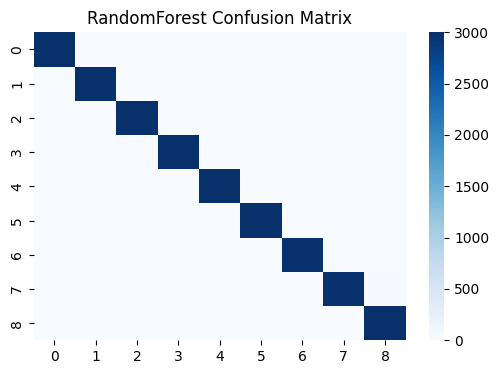

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[00:13:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





XGBoost Accuracy: 0.9991
              precision    recall  f1-score   support

apachekiller       1.00      1.00      1.00      3000
 arpspoofing       1.00      1.00      1.00      3000
 camoverflow       1.00      1.00      1.00      3000
 mqttmalaria       1.00      1.00      1.00      3000
     netscan       1.00      1.00      1.00      3000
      normal       1.00      1.00      1.00      3000
   rudeadyet       1.00      1.00      1.00      3000
   slowloris       1.00      1.00      1.00      3000
    slowread       1.00      1.00      1.00      3000

    accuracy                           1.00     27000
   macro avg       1.00      1.00      1.00     27000
weighted avg       1.00      1.00      1.00     27000



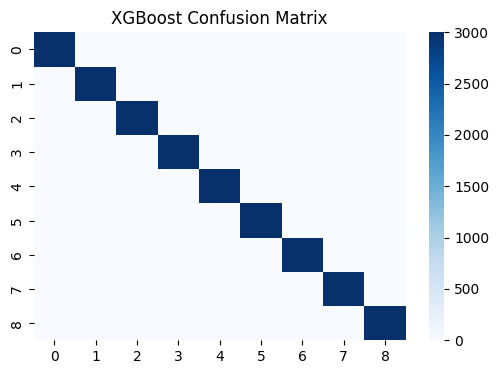

In [66]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "RandomForest": RandomForestClassifier(n_estimators=150, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=150, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    results[name] = acc
    
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

In [67]:
class CNN_BiLSTM_Attention(nn.Module):
    def __init__(self, input_len, num_classes, lstm_hidden=64, num_heads=4):
        super(CNN_BiLSTM_Attention, self).__init__()
        
        # CNN feature extractor
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, padding='same')
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding='same')
        self.pool = nn.MaxPool1d(2)
        
        # BiLSTM block
        self.bilstm = nn.LSTM(
            input_size=128,
            hidden_size=lstm_hidden,
            batch_first=True,
            bidirectional=True
        )

        # Multi-Head Self-Attention
        self.attention = nn.MultiheadAttention(embed_dim=2*lstm_hidden, num_heads=num_heads, batch_first=True)
        self.norm = nn.LayerNorm(2*lstm_hidden)

        # Dense layers
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(2*lstm_hidden, 128)
        self.dropout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Input shape: (batch, seq_len, 1)
        x = x.permute(0, 2, 1)                 # (batch, 1, seq_len)
        x = torch.relu(self.conv1(x))          # (batch, 64, seq_len)
        x = torch.relu(self.conv2(x))          # (batch, 128, seq_len)
        x = self.pool(x)                       # (batch, 128, seq_len//2)
        
        # Prepare for LSTM: (batch, seq_len, features)
        x = x.permute(0, 2, 1)
        x, _ = self.bilstm(x)                  # (batch, seq_len//2, 2*lstm_hidden)
        
        # Multihead Self-Attention with residual connection
        attn_output, _ = self.attention(x, x, x)
        x = self.norm(x + attn_output)

        # Global average pooling over the sequence dimension
        x = x.permute(0, 2, 1)
        x = self.global_pool(x).squeeze(-1)    # (batch, 2*lstm_hidden)
        
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)                        # logits
        return x


In [68]:
class CNN_BiLSTM(nn.Module):
    def __init__(self, input_len, num_classes, lstm_hidden=64):
        super(CNN_BiLSTM, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, padding='same')
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding='same')
        self.pool = nn.MaxPool1d(2)

        self.bilstm = nn.LSTM(
            input_size=128,
            hidden_size=lstm_hidden,
            batch_first=True,
            bidirectional=True
        )

        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(2*lstm_hidden, 128)
        self.dropout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.permute(0, 2, 1)
        x, _ = self.bilstm(x)
        x = x.permute(0, 2, 1)
        x = self.global_pool(x).squeeze(-1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)


In [69]:
class CNN_Attention(nn.Module):
    def __init__(self, input_len, num_classes, num_heads=4):
        super(CNN_Attention, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, padding='same')
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding='same')
        self.pool = nn.MaxPool1d(2)

        self.attention = nn.MultiheadAttention(embed_dim=128, num_heads=num_heads, batch_first=True)
        self.norm = nn.LayerNorm(128)

        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(128, 128)
        self.dropout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.permute(0, 2, 1)
        attn_output, _ = self.attention(x, x, x)
        x = self.norm(x + attn_output)
        x = x.permute(0, 2, 1)
        x = self.global_pool(x).squeeze(-1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)


In [70]:
class BiLSTM_Attention(nn.Module):
    def __init__(self, input_len, num_classes, lstm_hidden=64, num_heads=4):
        super(BiLSTM_Attention, self).__init__()
        self.bilstm = nn.LSTM(
            input_size=input_len,  # directly process feature sequences
            hidden_size=lstm_hidden,
            batch_first=True,
            bidirectional=True
        )

        self.attention = nn.MultiheadAttention(embed_dim=2*lstm_hidden, num_heads=num_heads, batch_first=True)
        self.norm = nn.LayerNorm(2*lstm_hidden)

        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(2*lstm_hidden, 128)
        self.dropout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Input: (batch, seq_len, features)
        x, _ = self.bilstm(x)
        attn_output, _ = self.attention(x, x, x)
        x = self.norm(x + attn_output)
        x = x.permute(0, 2, 1)
        x = self.global_pool(x).squeeze(-1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)


In [71]:
from sklearn.metrics import accuracy_score
import torch.nn.functional as F
import matplotlib.pyplot as plt

# -----------------------------------------------------
# Training function
# -----------------------------------------------------
def train_model(model, train_loader, val_loader, device, epochs=20, lr=1e-3):
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    for epoch in range(epochs):
        model.train()
        total_loss, all_preds, all_labels = 0, [], []

        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            preds = out.argmax(1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(yb.cpu().numpy())

        train_acc = accuracy_score(all_labels, all_preds)
        train_losses.append(total_loss / len(train_loader))
        train_accs.append(train_acc)

        # Validation
        model.eval()
        val_loss, val_preds, val_labels = 0, [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                out = model(xb)
                loss = criterion(out, yb)
                val_loss += loss.item()
                preds = out.argmax(1)
                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(yb.cpu().numpy())

        val_acc = accuracy_score(val_labels, val_preds)
        val_losses.append(val_loss / len(val_loader))
        val_accs.append(val_acc)

        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | "
              f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    # Plot curves
    plt.figure(figsize=(6, 4))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.title("Training Curve")
    plt.legend()
    plt.show()

    return model


# -----------------------------------------------------
# Evaluation function
# -----------------------------------------------------
def evaluate_model(model, data_loader, device):
    model.eval()
    criterion = nn.CrossEntropyLoss()
    total_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for xb, yb in data_loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            loss = criterion(out, yb)
            total_loss += loss.item()

            preds = out.argmax(1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(yb.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    avg_loss = total_loss / len(data_loader)
    return avg_loss, acc


In [72]:
# Add an extra dimension at the end
X_train_t = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # (batch, seq_len, 1)
X_val_t   = torch.tensor(X_val, dtype=torch.float32).unsqueeze(-1)    # (batch, seq_len, 1)
y_train_t = torch.tensor(y_train, dtype=torch.long)
y_val_t   = torch.tensor(y_val.values, dtype=torch.long)

In [73]:
train_loader = DataLoader(
    TensorDataset(X_train_t, y_train_t),
    batch_size=128,
    shuffle=True
)
val_loader = DataLoader(
    TensorDataset(X_val_t, y_val_t),
    batch_size=128,
    shuffle=False
)

In [74]:
# For CNN-based models: add channel dimension
X_train_cnn = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
X_val_cnn   = torch.tensor(X_val, dtype=torch.float32).unsqueeze(-1)

# For LSTM-only models: no need to unsqueeze
X_train_lstm = torch.tensor(X_train, dtype=torch.float32)
X_val_lstm   = torch.tensor(X_val, dtype=torch.float32)

# Then create separate DataLoaders for CNN vs LSTM
train_loader_cnn = DataLoader(TensorDataset(X_train_cnn, y_train_t), batch_size=128, shuffle=True)
val_loader_cnn   = DataLoader(TensorDataset(X_val_cnn, y_val_t), batch_size=128, shuffle=False)

train_loader_lstm = DataLoader(TensorDataset(X_train_lstm, y_train_t), batch_size=128, shuffle=True)
val_loader_lstm   = DataLoader(TensorDataset(X_val_lstm, y_val_t), batch_size=128, shuffle=False)

In [75]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import torch.nn.functional as F
import time
from thop import profile  # for FLOPs and Params

# Helper to compute classification metrics
def classification_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='macro')
    recall    = recall_score(y_true, y_pred, average='macro')
    f1        = f1_score(y_true, y_pred, average='macro')
    cm        = confusion_matrix(y_true, y_pred)
    return precision, recall, f1, cm

# Ablation study loop
for name, model in models.items():
    print(f"\n🚀 Training {name} ...")
    
    # Select correct loaders
    if "CNN" in name:
        trained_model = train_model(model, train_loader_cnn, val_loader_cnn, device=DEVICE)
        loader_eval = test_loader_cnn
    else:
        trained_model = train_model(model, train_loader_lstm, val_loader_lstm, device=DEVICE)
        loader_eval = test_loader_lstm
    
    # --- Evaluation ---
    trained_model.eval()
    all_preds, all_labels = [], []
    y_scores = []
    start_time = time.time()
    with torch.no_grad():
        for xb, yb in loader_eval:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            out = trained_model(xb)
            preds = out.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(yb.cpu().numpy())
            y_scores.append(F.softmax(out, dim=1).cpu().numpy())
    end_time = time.time()
    
    y_scores = np.vstack(y_scores)
    
    # Metrics
    test_acc = accuracy_score(all_labels, all_preds)
    precision, recall, f1, cm = classification_metrics(all_labels, all_preds)
    avg_infer_time = (end_time - start_time) / len(loader_eval)
    
    # FLOPs and params (first batch only)
    xb, _ = next(iter(loader_eval))
    flops, params = profile(trained_model, inputs=(xb.to(DEVICE),), verbose=False)
    
    # Print results
    print(f"✅ {name} | Acc: {test_acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    print(f"   Params: {params/1e6:.2f} M | FLOPs: {flops/1e6:.2f} M | Avg Infer Time: {avg_infer_time*1000:.2f} ms/batch")
    print("   Confusion Matrix:\n", cm)



🚀 Training RandomForest ...


AttributeError: 'RandomForestClassifier' object has no attribute 'to'

Epoch 1/20 | Train Loss: 0.2625 | Val Loss: 0.1018 | Train Acc: 0.9176 | Val Acc: 0.9723
Epoch 2/20 | Train Loss: 0.0871 | Val Loss: 0.0668 | Train Acc: 0.9743 | Val Acc: 0.9792
Epoch 3/20 | Train Loss: 0.0620 | Val Loss: 0.0539 | Train Acc: 0.9817 | Val Acc: 0.9829
Epoch 4/20 | Train Loss: 0.0531 | Val Loss: 0.0484 | Train Acc: 0.9842 | Val Acc: 0.9840
Epoch 5/20 | Train Loss: 0.0437 | Val Loss: 0.0382 | Train Acc: 0.9870 | Val Acc: 0.9882
Epoch 6/20 | Train Loss: 0.0403 | Val Loss: 0.0605 | Train Acc: 0.9877 | Val Acc: 0.9839
Epoch 7/20 | Train Loss: 0.0385 | Val Loss: 0.0473 | Train Acc: 0.9884 | Val Acc: 0.9866
Epoch 8/20 | Train Loss: 0.0352 | Val Loss: 0.0346 | Train Acc: 0.9888 | Val Acc: 0.9890
Epoch 9/20 | Train Loss: 0.0339 | Val Loss: 0.0317 | Train Acc: 0.9891 | Val Acc: 0.9898
Epoch 10/20 | Train Loss: 0.0298 | Val Loss: 0.0275 | Train Acc: 0.9908 | Val Acc: 0.9920
Epoch 11/20 | Train Loss: 0.0296 | Val Loss: 0.0279 | Train Acc: 0.9912 | Val Acc: 0.9920
Epoch 12/20 | Train

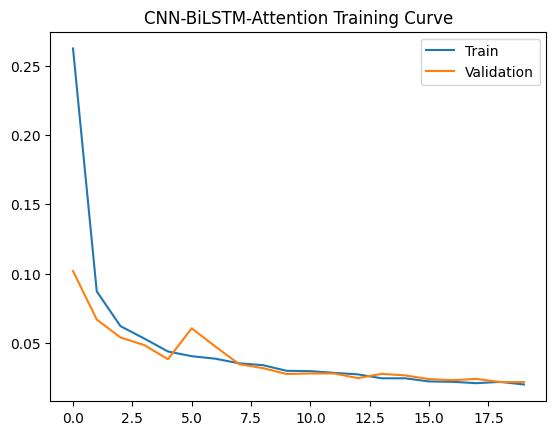

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset
X_train_t = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
X_val_t = torch.tensor(X_val, dtype=torch.float32).unsqueeze(-1)
y_train_t = torch.tensor(y_train.values, dtype=torch.long)
y_val_t = torch.tensor(y_val.values, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=128, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=128, shuffle=False)

# Model
num_classes = len(le.classes_)
input_len = X_train_t.shape[1]
model = CNN_BiLSTM_Attention(input_len, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
EPOCHS = 20

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(EPOCHS):
    # ---- Training ----
    model.train()
    total_loss = 0
    all_preds, all_labels = [], []

    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(Xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        preds = torch.argmax(out, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

    train_acc = accuracy_score(all_labels, all_preds)
    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(train_acc)

    # ---- Validation ----
    model.eval()
    val_loss = 0
    val_preds, val_labels = [], []
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            outputs = model(Xb)
            loss = criterion(outputs, yb)
            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(yb.cpu().numpy())

    val_acc = accuracy_score(val_labels, val_preds)
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | "
          f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

# Plot loss
plt.plot(train_losses, label="Train")
plt.plot(val_losses, label="Validation")
plt.legend()
plt.title("CNN-BiLSTM-Attention Training Curve")
plt.show()


In [78]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

def make_dataloaders(X_train, y_train, X_val, y_val, bs=128):
    # ensure numpy arrays (float32) and labels longs
    if hasattr(X_train, "values"): X_train = X_train.values
    if hasattr(X_val, "values"): X_val = X_val.values
    X_train = X_train.astype(np.float32)
    X_val   = X_val.astype(np.float32)
    y_train = np.array(y_train).astype(np.int64)
    y_val   = np.array(y_val).astype(np.int64)

    # shape -> (N, seq_len) expected. we will add channel dim in model if needed.
    train_ds = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
    val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))

    return (DataLoader(train_ds, batch_size=bs, shuffle=True, num_workers=4, pin_memory=True),
            DataLoader(val_ds,   batch_size=bs, shuffle=False, num_workers=4, pin_memory=True))

Device: cuda


In [79]:
import torch.nn as nn
import torch.nn.functional as F

class DenseNN(nn.Module):
    def __init__(self, input_dim, hidden_dims=[512,256,128], num_classes=6, dropout=0.4, leaky_slope=0.01):
        super().__init__()
        layers = []
        in_d = input_dim
        for h in hidden_dims:
            layers.append(nn.Linear(in_d, h))
            layers.append(nn.BatchNorm1d(h))
            layers.append(nn.LeakyReLU(negative_slope=leaky_slope))
            layers.append(nn.Dropout(dropout))
            in_d = h
        layers.append(nn.Linear(in_d, num_classes))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        # expect x: (batch, seq_len) or (batch, features)
        if x.dim() == 3:  # if (batch, seq_len, 1)
            x = x.squeeze(-1)
        return self.net(x)

In [80]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np


# -------------------------------
# Positional Encoding (optional)
# -------------------------------
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        pos = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model)
        )
        pe[:, 0::2] = torch.sin(pos * div_term)
        pe[:, 1::2] = torch.cos(pos * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer("pe", pe)

    def forward(self, x):
        seq_len = x.size(1)
        return x + self.pe[:, :seq_len, :]


# -------------------------------
# Residual Block for 1D conv
# -------------------------------
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding="same")
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding="same")
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.shortcut = (
            nn.Conv1d(in_channels, out_channels, kernel_size=1)
            if in_channels != out_channels else nn.Identity()
        )

    def forward(self, x):
        residual = self.shortcut(x)
        out = F.leaky_relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += residual
        out = F.leaky_relu(out)
        return out


# -------------------------------
# RCLNet_Attn_Pro (Tabular-ready)
# -------------------------------
class RCLNet_Attn_Pro(nn.Module):
    def __init__(self, input_features, num_classes):
        super(RCLNet_Attn_Pro, self).__init__()

        # Treat features as "sequence length = 1" if needed
        self.expand_dim = nn.Linear(input_features, input_features)
        self.res1 = ResidualBlock(1, 64)
        self.res2 = ResidualBlock(64, 128)
        self.pool = nn.AdaptiveMaxPool1d(32)

        # BiLSTM + Attention
        self.lstm = nn.LSTM(input_size=128, hidden_size=64, batch_first=True, bidirectional=True)
        self.attn = nn.MultiheadAttention(embed_dim=128, num_heads=4, dropout=0.2, batch_first=True)
        self.norm = nn.LayerNorm(128)

        # Dense classifier
        self.fc1 = nn.Linear(128, 256)
        self.drop = nn.Dropout(0.4)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        # x: (B, F)
        x = self.expand_dim(x).unsqueeze(1)  # (B, 1, F)

        x = self.res1(x)
        x = self.res2(x)
        x = self.pool(x)  # (B, 128, seq_len=32)
        x = x.permute(0, 2, 1)  # (B, seq_len, F)

        # BiLSTM + Attention
        x, _ = self.lstm(x)
        attn_out, _ = self.attn(x, x, x)
        x = self.norm(x + attn_out)

        # Global average pooling
        x = x.mean(dim=1)

        # Dense classifier
        x = F.leaky_relu(self.fc1(x))
        x = self.drop(x)
        x = self.fc2(x)
        return x

In [81]:
# Example instantiation
input_features = X_train.shape[1]           # number of columns
num_classes = len(np.unique(y_train))
model_dense = DenseNN(input_dim=input_features, num_classes=num_classes).to(device)

# For RCLNet_Attn_Pro instantiate like:
model_rcl = RCLNet_Attn_Pro(input_features=input_features, num_classes=num_classes).to(device)
# Note: RCLNet_Attn_Pro expects input (batch, seq_len, features). If your data is (N, F) use features as "seq_len" below.


In [82]:
import torch.optim as optim
from tqdm import tqdm

def train_eval(model, train_loader, val_loader, epochs=20, lr=1e-3, save_path="model.pth"):
    model = model.to(device)
    optimz = optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    best_val_acc = 0.0
    history = {"train_loss":[], "val_loss":[], "train_acc":[], "val_acc":[]}

    for epoch in range(1, epochs+1):
        model.train()
        train_losses = []
        train_preds, train_labels = [], []
        pbar = tqdm(train_loader, desc=f"Train E{epoch}")
        for xb, yb in pbar:
            xb, yb = xb.to(device).float(), yb.to(device).long()
            optimz.zero_grad()
            logits = model(xb)
            loss = criterion(logits, yb)
            loss.backward()
            optimz.step()
            train_losses.append(loss.item())

            preds = logits.argmax(dim=1).detach().cpu().numpy()
            train_preds.extend(preds)
            train_labels.extend(yb.detach().cpu().numpy())
            pbar.set_postfix(loss=np.mean(train_losses))

        train_acc = accuracy_score(train_labels, train_preds)

        # validation
        model.eval()
        val_losses = []
        val_preds, val_labels = [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device).float(), yb.to(device).long()
                logits = model(xb)
                loss = criterion(logits, yb)
                val_losses.append(loss.item())
                preds = logits.argmax(dim=1).cpu().numpy()
                val_preds.extend(preds)
                val_labels.extend(yb.cpu().numpy())

        val_acc = accuracy_score(val_labels, val_preds)

        history["train_loss"].append(np.mean(train_losses))
        history["val_loss"].append(np.mean(val_losses))
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)

        print(f"Epoch {epoch}/{epochs}  TrainAcc {train_acc:.4f}  ValAcc {val_acc:.4f}  TrainLoss {history['train_loss'][-1]:.4f} ValLoss {history['val_loss'][-1]:.4f}")

        # save best model by val acc
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), save_path)
    print("Best val acc:", best_val_acc)
    return history

In [83]:
train_loader, val_loader = make_dataloaders(X_train, y_train, X_val, y_val, bs=128)
history = train_eval(model_dense, train_loader, val_loader, epochs=20, lr=1e-3, save_path="rclnet_best.pth")

Train E1: 100%|██████████| 985/985 [00:06<00:00, 160.29it/s, loss=0.176]


Epoch 1/20  TrainAcc 0.9548  ValAcc 0.9747  TrainLoss 0.1758 ValLoss 0.0904


Train E2: 100%|██████████| 985/985 [00:05<00:00, 176.30it/s, loss=0.0991]


Epoch 2/20  TrainAcc 0.9716  ValAcc 0.9757  TrainLoss 0.0991 ValLoss 0.0760


Train E3: 100%|██████████| 985/985 [00:05<00:00, 182.17it/s, loss=0.0883]


Epoch 3/20  TrainAcc 0.9735  ValAcc 0.9787  TrainLoss 0.0883 ValLoss 0.0691


Train E4: 100%|██████████| 985/985 [00:05<00:00, 178.90it/s, loss=0.0814]


Epoch 4/20  TrainAcc 0.9749  ValAcc 0.9796  TrainLoss 0.0814 ValLoss 0.0628


Train E5: 100%|██████████| 985/985 [00:05<00:00, 178.82it/s, loss=0.077] 


Epoch 5/20  TrainAcc 0.9760  ValAcc 0.9795  TrainLoss 0.0770 ValLoss 0.0601


Train E6: 100%|██████████| 985/985 [00:05<00:00, 176.75it/s, loss=0.0699]


Epoch 6/20  TrainAcc 0.9786  ValAcc 0.9859  TrainLoss 0.0699 ValLoss 0.0578


Train E7: 100%|██████████| 985/985 [00:05<00:00, 182.98it/s, loss=0.0652]


Epoch 7/20  TrainAcc 0.9806  ValAcc 0.9704  TrainLoss 0.0652 ValLoss 0.0750


Train E8: 100%|██████████| 985/985 [00:05<00:00, 185.30it/s, loss=0.0619]


Epoch 8/20  TrainAcc 0.9820  ValAcc 0.9824  TrainLoss 0.0619 ValLoss 0.0740


Train E9: 100%|██████████| 985/985 [00:05<00:00, 173.88it/s, loss=0.0585]


Epoch 9/20  TrainAcc 0.9829  ValAcc 0.9483  TrainLoss 0.0585 ValLoss 0.1354


Train E10: 100%|██████████| 985/985 [00:05<00:00, 176.58it/s, loss=0.0568]


Epoch 10/20  TrainAcc 0.9834  ValAcc 0.9849  TrainLoss 0.0568 ValLoss 0.0528


Train E11: 100%|██████████| 985/985 [00:05<00:00, 184.25it/s, loss=0.0556]


Epoch 11/20  TrainAcc 0.9837  ValAcc 0.9872  TrainLoss 0.0556 ValLoss 0.0434


Train E12: 100%|██████████| 985/985 [00:05<00:00, 178.71it/s, loss=0.0537]


Epoch 12/20  TrainAcc 0.9842  ValAcc 0.9488  TrainLoss 0.0537 ValLoss 0.1299


Train E13: 100%|██████████| 985/985 [00:05<00:00, 173.33it/s, loss=0.0535]


Epoch 13/20  TrainAcc 0.9842  ValAcc 0.9490  TrainLoss 0.0535 ValLoss 0.1255


Train E14: 100%|██████████| 985/985 [00:05<00:00, 184.78it/s, loss=0.0525]


Epoch 14/20  TrainAcc 0.9849  ValAcc 0.9733  TrainLoss 0.0525 ValLoss 0.0646


Train E15: 100%|██████████| 985/985 [00:05<00:00, 168.04it/s, loss=0.0499]


Epoch 15/20  TrainAcc 0.9854  ValAcc 0.9617  TrainLoss 0.0499 ValLoss 0.0811


Train E16: 100%|██████████| 985/985 [00:05<00:00, 174.84it/s, loss=0.0511]


Epoch 16/20  TrainAcc 0.9851  ValAcc 0.9485  TrainLoss 0.0511 ValLoss 0.1551


Train E17: 100%|██████████| 985/985 [00:06<00:00, 160.44it/s, loss=0.0491]


Epoch 17/20  TrainAcc 0.9856  ValAcc 0.9789  TrainLoss 0.0491 ValLoss 0.0555


Train E18: 100%|██████████| 985/985 [00:05<00:00, 164.87it/s, loss=0.0469]


Epoch 18/20  TrainAcc 0.9862  ValAcc 0.9870  TrainLoss 0.0469 ValLoss 0.0400


Train E19: 100%|██████████| 985/985 [00:05<00:00, 167.19it/s, loss=0.0476]


Epoch 19/20  TrainAcc 0.9857  ValAcc 0.9493  TrainLoss 0.0476 ValLoss 0.1243


Train E20: 100%|██████████| 985/985 [00:05<00:00, 171.75it/s, loss=0.0469]


Epoch 20/20  TrainAcc 0.9855  ValAcc 0.9880  TrainLoss 0.0469 ValLoss 0.0363
Best val acc: 0.988037037037037


In [84]:
input_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

model_rcl = RCLNet_Attn_Pro(input_features=input_features, num_classes=num_classes).to(device)

history = train_eval(
    model_rcl,
    train_loader,
    val_loader,
    epochs=20,
    lr=1e-3,
    save_path="rclnet_best.pth"
)


Train E1: 100%|██████████| 985/985 [00:12<00:00, 81.72it/s, loss=0.173] 


Epoch 1/20  TrainAcc 0.9514  ValAcc 0.9732  TrainLoss 0.1727 ValLoss 0.0925


Train E2: 100%|██████████| 985/985 [00:10<00:00, 89.78it/s, loss=0.0851] 


Epoch 2/20  TrainAcc 0.9746  ValAcc 0.9832  TrainLoss 0.0851 ValLoss 0.0705


Train E3: 100%|██████████| 985/985 [00:10<00:00, 92.86it/s, loss=0.0654] 


Epoch 3/20  TrainAcc 0.9812  ValAcc 0.9856  TrainLoss 0.0654 ValLoss 0.0559


Train E4: 100%|██████████| 985/985 [00:10<00:00, 92.95it/s, loss=0.0865] 


Epoch 4/20  TrainAcc 0.9765  ValAcc 0.9749  TrainLoss 0.0865 ValLoss 0.0730


Train E5: 100%|██████████| 985/985 [00:10<00:00, 90.30it/s, loss=0.0586] 


Epoch 5/20  TrainAcc 0.9838  ValAcc 0.9856  TrainLoss 0.0586 ValLoss 0.0510


Train E6: 100%|██████████| 985/985 [00:10<00:00, 91.56it/s, loss=0.0549] 


Epoch 6/20  TrainAcc 0.9846  ValAcc 0.9191  TrainLoss 0.0549 ValLoss 0.3298


Train E7: 100%|██████████| 985/985 [00:10<00:00, 91.76it/s, loss=0.0531] 


Epoch 7/20  TrainAcc 0.9852  ValAcc 0.9866  TrainLoss 0.0531 ValLoss 0.0471


Train E8: 100%|██████████| 985/985 [00:10<00:00, 93.20it/s, loss=0.0521] 


Epoch 8/20  TrainAcc 0.9854  ValAcc 0.9384  TrainLoss 0.0521 ValLoss 0.1913


Train E9: 100%|██████████| 985/985 [00:10<00:00, 89.56it/s, loss=0.052]  


Epoch 9/20  TrainAcc 0.9853  ValAcc 0.9846  TrainLoss 0.0520 ValLoss 0.0533


Train E10: 100%|██████████| 985/985 [00:10<00:00, 92.08it/s, loss=0.0491] 


Epoch 10/20  TrainAcc 0.9865  ValAcc 0.9841  TrainLoss 0.0491 ValLoss 0.0557


Train E11: 100%|██████████| 985/985 [00:10<00:00, 90.17it/s, loss=0.0465] 


Epoch 11/20  TrainAcc 0.9869  ValAcc 0.9870  TrainLoss 0.0465 ValLoss 0.0459


Train E12: 100%|██████████| 985/985 [00:10<00:00, 91.63it/s, loss=0.046]  


Epoch 12/20  TrainAcc 0.9869  ValAcc 0.9877  TrainLoss 0.0460 ValLoss 0.0434


Train E13: 100%|██████████| 985/985 [00:10<00:00, 90.63it/s, loss=0.0456] 


Epoch 13/20  TrainAcc 0.9869  ValAcc 0.9876  TrainLoss 0.0456 ValLoss 0.0425


Train E14: 100%|██████████| 985/985 [00:10<00:00, 90.71it/s, loss=0.0458] 


Epoch 14/20  TrainAcc 0.9873  ValAcc 0.9861  TrainLoss 0.0458 ValLoss 0.0460


Train E15: 100%|██████████| 985/985 [00:10<00:00, 93.05it/s, loss=0.0431] 


Epoch 15/20  TrainAcc 0.9873  ValAcc 0.9886  TrainLoss 0.0431 ValLoss 0.0418


Train E16: 100%|██████████| 985/985 [00:10<00:00, 90.06it/s, loss=0.0504] 


Epoch 16/20  TrainAcc 0.9859  ValAcc 0.9850  TrainLoss 0.0504 ValLoss 0.0488


Train E17: 100%|██████████| 985/985 [00:10<00:00, 92.29it/s, loss=0.0404] 


Epoch 17/20  TrainAcc 0.9877  ValAcc 0.9880  TrainLoss 0.0404 ValLoss 0.0393


Train E18: 100%|██████████| 985/985 [00:10<00:00, 92.97it/s, loss=0.0408] 


Epoch 18/20  TrainAcc 0.9878  ValAcc 0.9870  TrainLoss 0.0408 ValLoss 0.0446


Train E19: 100%|██████████| 985/985 [00:11<00:00, 88.99it/s, loss=0.0397] 


Epoch 19/20  TrainAcc 0.9881  ValAcc 0.9882  TrainLoss 0.0397 ValLoss 0.0404


Train E20: 100%|██████████| 985/985 [00:10<00:00, 94.59it/s, loss=0.0401] 


Epoch 20/20  TrainAcc 0.9877  ValAcc 0.9884  TrainLoss 0.0401 ValLoss 0.0386
Best val acc: 0.9885555555555555


In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [86]:
NUM_FOLDS = 5
SEED = 42
np.random.seed(SEED)

# Ensure numpy arrays
if hasattr(X_train, "values"):
    X_train = X_train.values
    X_val = X_val.values
    X_test = X_test.values
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Combine train + val for stacking
X_stack = np.concatenate([X_train, X_val])
y_stack = np.concatenate([y_train, y_val])

In [87]:
lgbm = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=SEED,
    n_jobs=-1
)

xgbm = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=SEED,
    n_jobs=-1
)

catb = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_seed=SEED
)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=SEED,
    n_jobs=-1
)

base_models = {
    "LightGBM": lgbm,
    "XGBoost": xgbm,
    "CatBoost": catb,
    "RandomForest": rf
}

In [88]:
# oof_preds = np.zeros((X_stack.shape[0], len(base_models)))
# test_preds = np.zeros((X_test.shape[0], len(base_models)))

# skf = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEED)

# for fold, (train_idx, val_idx) in enumerate(skf.split(X_stack, y_stack)):
#     print(f"\n🌀 Fold {fold+1}/{NUM_FOLDS}")
#     X_tr, X_val_f = X_stack[train_idx], X_stack[val_idx]
#     y_tr, y_val_f = y_stack[train_idx], y_stack[val_idx]

#     for i, (name, model) in enumerate(base_models.items()):
#         model.fit(X_tr, y_tr)
#         oof_preds[val_idx, i] = model.predict(X_val_f)
#         test_preds[:, i] += model.predict(X_test) / NUM_FOLDS

In [89]:
# meta_learner = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=SEED)
# meta_learner.fit(oof_preds, y_stack)
# final_preds = meta_learner.predict(test_preds)

In [90]:
# acc = accuracy_score(y_test, final_preds)
# f1 = f1_score(y_test, final_preds, average='macro')
# print(f"\n✅ Stacked Model Accuracy: {acc:.4f} | Macro F1: {f1:.4f}\n")
# print(classification_report(y_test, final_preds, target_names=le.classes_))

# # Confusion Matrix
# plt.figure(figsize=(10,7))
# sns.heatmap(confusion_matrix(y_test, final_preds), annot=True, fmt='d', cmap='Blues',
#             xticklabels=le.classes_, yticklabels=le.classes_)
# plt.title("Stacked Model Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.show()

In [91]:
from lime import lime_tabular
import shap
import numpy as np

# Prediction function usable by both LIME and SHAP
def predict_fn(model, X):
    model.eval()
    X = torch.tensor(X, dtype=torch.float32).to(device)
    with torch.no_grad():
        logits = model(X)
        probs = torch.softmax(logits, dim=1)
    return probs.cpu().numpy()

In [92]:
from collections import defaultdict

client_lime_summaries = defaultdict(list)  

In [93]:
from lime.lime_tabular import LimeTabularExplainer
from collections import defaultdict, Counter
import numpy as np

# Flatten X for LIME (your model takes 45x1 but LIME needs 2D)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
feature_names = [f"feature_{i}" for i in range(X_train_flat.shape[1])]
class_names = [str(c) for c in range(num_classes)]

lime_explainer = LimeTabularExplainer(
    X_train_flat,
    feature_names=X.columns.tolist(),
    class_names=class_names,
    discretize_continuous=True
)

client_lime_summaries = defaultdict(list)

In [94]:
from sklearn.model_selection import StratifiedKFold
from torch.utils.data import Subset
import numpy as np

num_clients = 5  # example

X_all = X_train_t.numpy().squeeze(-1)
y_all = y_train_t.numpy()

skf = StratifiedKFold(n_splits=num_clients, shuffle=True, random_state=42)
client_datasets = []

for _, client_idx in skf.split(X_all, y_all):
    subset = TensorDataset(torch.tensor(X_all[client_idx], dtype=torch.float32).unsqueeze(-1),
                           torch.tensor(y_all[client_idx], dtype=torch.long))
    client_datasets.append(subset)

client_loaders = [
    DataLoader(ds, batch_size=64, shuffle=True) for ds in client_datasets
]

In [95]:
# Requirements:
# pip install lime shap matplotlib

import os
from lime import lime_tabular
import shap
import matplotlib.pyplot as plt

# Ensure output dirs
os.makedirs("lime_explanations", exist_ok=True)
os.makedirs("shap_plots", exist_ok=True)

def model_predict_proba_numpy(model, X_numpy, device=DEVICE):
    """
    X_numpy: (N, D) numpy array
    returns: (N, num_classes) numpy array of probabilities
    """
    model.eval()
    with torch.no_grad():
        xb = torch.tensor(X_numpy, dtype=torch.float32).to(device)
        out = model(xb)  # logits expected
        probs = torch.softmax(out, dim=1).cpu().numpy()
    return probs

def lime_explain_client(model_state_dict, client_X_np, client_y_np, feature_names=None,
                        num_samples_to_explain=5, kernel_width=None, save_html_prefix="client"):
    """
    model_state_dict: state_dict of locally trained model (from local_train return)
    client_X_np, client_y_np: numpy arrays for that client's dataset
    Produces LIME explanations for a few samples and saves HTML files.
    """
    # instantiate a fresh model and load local weights
    local_model = RCLNet_Attn_Pro(input_features, num_classes).to(DEVICE)
    local_model.load_state_dict(model_state_dict)
    local_model.eval()

    # prepare LIME explainer
    explainer = lime_tabular.LimeTabularExplainer(
        training_data=client_X_np,
        feature_names=X.columns.tolist(),
        class_names=[str(i) for i in range(num_classes)],
        mode='classification',
        discretize_continuous=True,
        kernel_width=kernel_width
    )

    num_explain = min(num_samples_to_explain, len(client_X_np))
    explanations = []
    for i in range(num_explain):
        x_instance = client_X_np[i]
        exp = explainer.explain_instance(
            x_instance,
            predict_fn=lambda x: model_predict_proba_numpy(local_model, np.array(x)),
            num_features=min(len(feature_names) if feature_names else x_instance.shape[0], 10)
        )
        html_path = f"lime_explanations/{save_html_prefix}_idx{i}.html"
        exp.save_to_file(html_path)
        explanations.append({
            "index": i,
            "html": html_path,
            "as_list": exp.as_list(),
            "predicted_proba": model_predict_proba_numpy(local_model, x_instance.reshape(1, -1))[0].tolist()
        })
    return explanations


def shap_beeswarm_for_global(global_model, X_background_np, X_to_explain_np,
                             feature_names=None, nsamples=100, plot_path="shap_plots/beeswarm.png"):
    """
    Compute SHAP values using KernelExplainer (black-box) and produce a beeswarm plot.
    - X_background_np: small sample used as background (e.g. 50-200 rows)
    - X_to_explain_np: rows to compute shap values on (e.g. X_test_np[:200])
    - nsamples: sampling parameter for KernelExplainer.shap_values (controls speed/accuracy)
    """
    # wrapper predict fn for shap (expects 2D numpy -> probabilities)
    f = lambda x: model_predict_proba_numpy(global_model, x, device=DEVICE)

    # Create KernelExplainer. This can be slow; keep background small.
    explainer = shap.KernelExplainer(f, X_background_np)

    # If multi-class: shap_values will be a list, one array per class.
    print("⏳ Computing SHAP values (this may take a while)...")
    shap_values = explainer.shap_values(X_to_explain_np, nsamples=nsamples)

    # Plot: for multiclass, shap_values is a list, so pick one class or stack for overall.
    plt.figure(figsize=(10, 6))
    if isinstance(shap_values, list):
        # Option A: plot beeswarm for class 0 (or loop classes)
        # To show combined importance, we often plot class-specific shap values.
        class_idx = 0
        shap.summary_plot(shap_values[class_idx], X_to_explain_np, feature_names=X.columns.tolist(), show=False)
    else:
        shap.summary_plot(shap_values, X_to_explain_np, feature_names=X.columns.tolist(), show=False)

    plt.tight_layout()
    plt.savefig(plot_path, dpi=150)
    plt.close()
    print(f"✅ SHAP beeswarm saved to {plot_path}")
    return shap_values


In [105]:
def fed_adaptive_median(state_dicts, client_losses):
    """
    Novel FL Aggregation: FedAdaptiveMedian (FAM)
    Combines:
      - Coordinate-wise median
      - Adaptive trust weights inversely proportional to client loss
    """
    n_clients = len(state_dicts)

    # ---- 1. Compute trust weights (inverse loss) ----
    losses = np.array(client_losses)
    inv_loss = 1 / (losses + 1e-8)
    weights = inv_loss / inv_loss.sum()    # normalize

    avg_state = {}
    
    # ---- 2. Perform coordinate-wise median (robust) ----
    for key in state_dicts[0].keys():

        tensors = torch.stack([sd[key].float() for sd in state_dicts], dim=0)

        # median for robustness
        median_val = torch.median(tensors, dim=0).values

        # difference of each client param from median
        diffs = tensors - median_val

        # adaptive scaling by trust weight
        weighted_update = sum(
            weights[i] * diffs[i] for i in range(n_clients)
        )

        # final aggregated model parameter
        avg_state[key] = median_val + weighted_update

    return avg_state

In [106]:
import copy
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import StratifiedKFold
import numpy as np
from tqdm import trange

# ------------------------------------------------
# ⚙️ Basic settings
# ------------------------------------------------
NUM_CLIENTS = 6
GLOBAL_ROUNDS = 10
LOCAL_EPOCHS = 2
BATCH_SIZE = 128
LR = 1e-3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

# ------------------------------------------------
# 🧩 Prepare data
# ------------------------------------------------
def ensure_numpy(a):
    if isinstance(a, np.ndarray):
        return a
    if hasattr(a, "values"):
        return a.values
    return np.array(a)

X_train_np = ensure_numpy(X_train)
y_train_np = ensure_numpy(y_train)
X_test_np = ensure_numpy(X_test)
y_test_np = ensure_numpy(y_test)

# Convert to tensors
X_train_t = torch.tensor(X_train_np, dtype=torch.float32)
y_train_t = torch.tensor(y_train_np, dtype=torch.long)
X_test_t  = torch.tensor(X_test_np, dtype=torch.float32)
y_test_t  = torch.tensor(y_test_np, dtype=torch.long)

# ------------------------------------------------
# 🧩 Client datasets
# ------------------------------------------------
skf = StratifiedKFold(n_splits=NUM_CLIENTS, shuffle=True, random_state=SEED)
client_datasets = [
    TensorDataset(X_train_t[idx], y_train_t[idx])
    for _, idx in skf.split(X_train_t, y_train_t)
]
client_loaders = [DataLoader(ds, batch_size=BATCH_SIZE, shuffle=True) for ds in client_datasets]
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=BATCH_SIZE, shuffle=False)

print(f"✅ Created {len(client_loaders)} client datasets.")

# ------------------------------------------------
# ⚖️ Federated averaging
# ------------------------------------------------
def fedavg_state_dicts(state_dicts):
    avg = copy.deepcopy(state_dicts[0])
    
    for k in avg.keys():
        try:
            # Only average floating tensors
            if torch.is_floating_point(state_dicts[0][k]):
                avg[k] = torch.stack([sd[k].float() for sd in state_dicts], dim=0).mean(dim=0)
            else:
                # Keep integer/buffer params (like num_batches_tracked) from first model
                avg[k] = state_dicts[0][k]
        except Exception as e:
            print(f"⚠️ Skipping key '{k}' due to mismatch: {e}")
    
    return avg


# ------------------------------------------------
# 💻 Local training function
# ------------------------------------------------
def local_train(model, loader, device, epochs=LOCAL_EPOCHS, lr=LR):
    model = copy.deepcopy(model).to(device)
    model.train()
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    total_loss, correct, total = 0.0, 0, 0
    for _ in range(epochs):
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * xb.size(0)
            correct += (out.argmax(1) == yb).sum().item()
            total += xb.size(0)

    return model.state_dict(), total_loss / total, correct / total

# ------------------------------------------------
# 📈 Evaluation
# ------------------------------------------------
def evaluate_model(model, loader, device):
    model.eval()
    criterion = nn.CrossEntropyLoss()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            val_loss += criterion(out, yb).item() * xb.size(0)
            correct += (out.argmax(1) == yb).sum().item()
            total += xb.size(0)
    return val_loss / total, correct / total

# ------------------------------------------------
# 🚀 Initialize global model
# ------------------------------------------------
input_features = X_train_t.shape[1]
num_classes = len(np.unique(y_train_np))
global_model = RCLNet_Attn_Pro(input_features, num_classes).to(DEVICE)
print(f"🧠 Model parameters: {sum(p.numel() for p in global_model.parameters()):,}")

# ------------------------------------------------
# 🌍 Main Federated Training Loop
# ------------------------------------------------
best_acc = 0
best_state = None

for round_ in range(1, GLOBAL_ROUNDS + 1):
    print(f"\n🌐 Global Round {round_}/{GLOBAL_ROUNDS}")
    local_states, local_losses, local_accs = [], [], []

    for i, loader in enumerate(client_loaders, start=1):
        print(f"Client {i}: Training on {len(loader.dataset)} samples...")
        local_state, loss_c, acc_c = local_train(global_model, loader, DEVICE)
        local_states.append(local_state)
        local_losses.append(loss_c)
        local_accs.append(acc_c)
        print(f"  ↳ Loss: {loss_c:.4f}, Acc: {acc_c:.4f}")

        # --- RUN LIME on this client's local model (small sample) ---
        # extract the client's raw numpy arrays for LIME background/explanations
        client_X_np = client_datasets[i-1].tensors[0].cpu().numpy()
        client_y_np = client_datasets[i-1].tensors[1].cpu().numpy()
        feature_names = [f"f{j}" for j in range(client_X_np.shape[1])]  # replace with your real names

        lime_explanations = lime_explain_client(
            model_state_dict=local_state,
            client_X_np=client_X_np,
            client_y_np=client_y_np,
            feature_names=feature_names,
            num_samples_to_explain=3,   # quick: explain 3 samples per client
            save_html_prefix=f"client{i}"
        )
        print(f"  ↳ Saved {len(lime_explanations)} LIME explanations for client {i}.")

    # Average client weights
    new_state = fed_adaptive_median(local_states, local_losses)
    global_model.load_state_dict(new_state)

    # Global evaluation
    val_loss, val_acc = evaluate_model(global_model, test_loader, DEVICE)
    print(f"🏁 Global Evaluation | Loss: {val_loss:.4f} | Acc: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        best_state = copy.deepcopy(global_model.state_dict())
        torch.save(best_state, "best_rclnet_fedavg.pth")
        print("✅ New best model saved!")

print(f"\n✅ Training complete. Best Global Accuracy: {best_acc:.4f}")


✅ Created 6 client datasets.
🧠 Model parameters: 304,967

🌐 Global Round 1/10
Client 1: Training on 21000 samples...
  ↳ Loss: 0.2873, Acc: 0.9197
  ↳ Saved 3 LIME explanations for client 1.
Client 2: Training on 21000 samples...
  ↳ Loss: 0.2852, Acc: 0.9201
  ↳ Saved 3 LIME explanations for client 2.
Client 3: Training on 21000 samples...
  ↳ Loss: 0.2772, Acc: 0.9228
  ↳ Saved 3 LIME explanations for client 3.
Client 4: Training on 21000 samples...
  ↳ Loss: 0.2665, Acc: 0.9259
  ↳ Saved 3 LIME explanations for client 4.
Client 5: Training on 21000 samples...
  ↳ Loss: 0.2861, Acc: 0.9180
  ↳ Saved 3 LIME explanations for client 5.
Client 6: Training on 21000 samples...
  ↳ Loss: 0.2789, Acc: 0.9211
  ↳ Saved 3 LIME explanations for client 6.
🏁 Global Evaluation | Loss: 0.2147 | Acc: 0.9196
✅ New best model saved!

🌐 Global Round 2/10
Client 1: Training on 21000 samples...
  ↳ Loss: 0.1344, Acc: 0.9644
  ↳ Saved 3 LIME explanations for client 1.
Client 2: Training on 21000 samples..

In [111]:
# After federated training is complete and global_model is final:
# Prepare background and test sample (keep small for speed).
bg_size = min(100, X_train_np.shape[0])
bg_idx = np.random.RandomState(SEED).choice(X_train_np.shape[0], bg_size, replace=False)
X_background_np = X_train_np[bg_idx]

# X to explain: maybe a subset of test set
explain_size = min(200, X_test_np.shape[0])
explain_idx = np.random.RandomState(SEED+1).choice(X_test_np.shape[0], explain_size, replace=False)
X_to_explain_np = X_test_np[explain_idx]

feature_names = [f"f{j}" for j in range(X_train_np.shape[1])]  # or your real names

# Compute and save beeswarm
shap_vals = shap_beeswarm_for_global(
    global_model,
    X_background_np=X_background_np,
    X_to_explain_np=X_to_explain_np,
    feature_names=feature_names,
    nsamples=100,  # increase for more accuracy (slower)
    plot_path="shap_plots/global_beeswarm.png"
)


⏳ Computing SHAP values (this may take a while)...


 68%|██████▊   | 135/200 [00:23<00:11,  5.68it/s]d:\Prog\iomt-anomalyze\venv\Lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.110e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.222e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.

 68%|██████▊   | 137/200 [00:24<00:11,  5.67it/s]d:\Prog\iomt-anomalyze\venv\Lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.069e-

✅ SHAP beeswarm saved to shap_plots/global_beeswarm.png


<Figure size 1000x600 with 0 Axes>

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import shap
import os

# Make sure the folder exists
os.makedirs("shap_plots", exist_ok=True)

# --- Select class to explain ---
class_idx = 1  # Change to the class you want

# Suppose shap_vals has shape (n_samples, n_features, n_classes)
shap_values_class = shap_vals[..., class_idx]  # shape: (n_samples, n_features)

# Use an array of zeros for base_values (length = n_samples)
base_value = np.zeros(shap_values_class.shape[0])

# Wrap into shap.Explanation
expl = shap.Explanation(
    values=shap_values_class,
    base_values=base_value,
    data=X_to_explain_np,
    feature_names=X.columns.tolist()
)

# -------------------------------
# SHAP Bar Plot
# -------------------------------
plt.figure(figsize=(8, 6))
shap.plots.bar(expl, max_display=15, show=False)
plt.tight_layout()
plt.savefig("shap_plots/global_bar_importance.png", dpi=150)
plt.close()
print("✅ Feature importance bar chart saved to shap_plots/global_bar_importance.png")

# -------------------------------
# SHAP Beeswarm Plot
# -------------------------------
plt.figure(figsize=(10, 6))
shap.plots.beeswarm(expl, max_display=15, show=False)
plt.tight_layout()
plt.savefig("shap_plots/global_beeswarm_modern.png", dpi=150)
plt.close()
print("✅ Modern SHAP beeswarm saved to shap_plots/global_beeswarm_modern.png")

✅ Feature importance bar chart saved to shap_plots/global_bar_importance.png
✅ Modern SHAP beeswarm saved to shap_plots/global_beeswarm_modern.png


In [109]:
# --- Top Features Bar Plot ---
plt.figure(figsize=(8, 6))
shap.plots.bar(expl, max_display=15, show=False)
plt.tight_layout()
plt.savefig("shap_plots/global_bar_importance.png", dpi=150)
plt.show()
plt.close()
print("✅ Feature importance bar chart saved to shap_plots/global_bar_importance.png")


NameError: name 'expl' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: overall importance
shap.plots.bar(expl, max_display=15, show=False)
axes[0].set_title("Top Features (mean |SHAP|)")

# Right: per-sample distribution
shap.plots.beeswarm(expl, max_display=15, show=False)
axes[1].set_title("Feature Impact Distribution")

plt.tight_layout()
plt.savefig("shap_plots/global_combined_shap.png", dpi=150)
plt.close()


In [ ]:
plt.figure(figsize=(8, 6))
shap.plots.bar(expl, max_display=15, show=False)
plt.tight_layout()
plt.savefig("shap_plots/global_beeswarm_barstyle.png", dpi=150)
plt.close()
print("✅ Bar-style beeswarm (ranked SHAP importance) saved.")

✅ Bar-style beeswarm (ranked SHAP importance) saved.


In [ ]:
X

,Unnamed: 0,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size
0,84579,56248,5353,0.0,0.0,0.0,0,1,78,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,84580,50214,5353,0.0,0.0,0.0,0,1,74,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,84581,58369,5353,0.0,0.0,0.0,0,1,73,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,84582,57377,5353,0.0,0.0,0.0,0,1,74,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,84583,12345,5353,0.0,0.0,0.0,0,1,74,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,3212450,37674,80,0.0,0.0,0.0,0,1,80,0,...,0.0,0.0,0.0,0.0,0.0,0.0,502,508,502,508
179996,3231811,60718,80,0.0,0.0,0.0,0,1,93,0,...,0.0,0.0,0.0,0.0,0.0,0.0,502,508,502,508
179997,3172471,42636,80,0.0,0.0,0.0,0,1,110,0,...,0.0,0.0,0.0,0.0,0.0,0.0,502,508,502,508
179998,3200140,53658,80,0.0,0.0,0.0,0,1,75,0,...,0.0,0.0,0.0,0.0,0.0,0.0,502,507,502,507


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

SEED = 42
NUM_FOLDS = 5

# =========================
# Define base models
# =========================
lgbm = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=SEED,
    n_jobs=-1
)

xgbm = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=SEED,
    n_jobs=-1,
    use_label_encoder=False
)

catb = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_seed=SEED
)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=SEED,
    n_jobs=-1
)

base_models = {
    "LightGBM": lgbm,
    "XGBoost": xgbm,
    "CatBoost": catb,
    "RandomForest": rf
}

# =========================
# Stacking setup
# =========================
X_stack = X_train.copy()
y_stack = y_train.copy()
X_test_ = X_test.copy()
y_test_ = y_test.copy()

oof_preds = np.zeros((X_stack.shape[0], len(base_models)))
test_preds = np.zeros((X_test_.shape[0], len(base_models)))

skf = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEED)

# =========================
# Cross-validation training
# =========================
for fold, (train_idx, val_idx) in enumerate(skf.split(X_stack, y_stack)):
    print(f"\n🌀 Fold {fold+1}/{NUM_FOLDS}")
    X_tr, X_val = X_stack[train_idx], X_stack[val_idx]
    y_tr, y_val = y_stack[train_idx], y_stack[val_idx]

    for i, (name, model) in enumerate(base_models.items()):
        print(f"  ▶ Training {name}...")
        model.fit(X_tr, y_tr)
        val_pred = model.predict(X_val)
        test_pred = model.predict(X_test_)

        # 🔧 Ensure 1D shape
        val_pred = np.ravel(val_pred)
        test_pred = np.ravel(test_pred)

        oof_preds[val_idx, i] = val_pred
        test_preds[:, i] += test_pred / NUM_FOLDS


# =========================
# Meta-learner
# =========================
meta_learner = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=SEED)
meta_learner.fit(oof_preds, y_stack)
final_preds = meta_learner.predict(test_preds)

# =========================
# Evaluation
# =========================
print("\n===============================")
print("📊 Classification Reports")
print("===============================")

for name, model in base_models.items():
    preds = model.predict(X_test_)
    print(f"\n{name}:\n", classification_report(y_test_, preds, digits=4))

print("\n🧩 Stacked Ensemble (Meta-Learner):\n", classification_report(y_test_, final_preds, digits=4))





🌀 Fold 1/5
  ▶ Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13129
[LightGBM] [Info] Number of data points in the train set: 100800, number of used features: 80
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

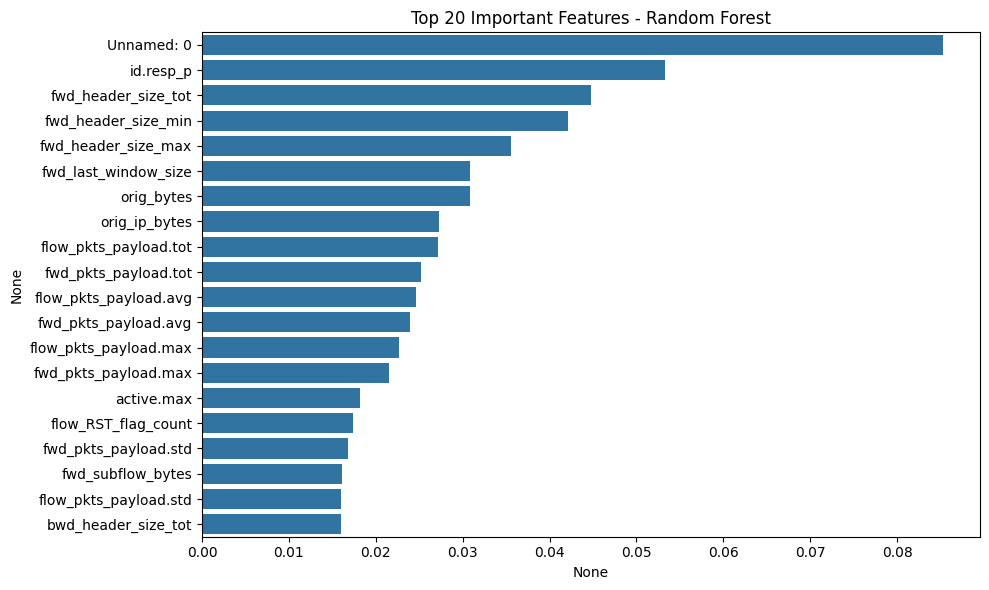

In [ ]:
# =========================
# Feature Importance (Random Forest)
# =========================
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:20], y=feat_imp.index[:20])
plt.title("Top 20 Important Features - Random Forest")
plt.tight_layout()
plt.show()

In [ ]:
class OneDCNN(nn.Module):
    def __init__(self, input_len, num_classes):
        super(OneDCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
        self.global_pool = nn.AdaptiveMaxPool1d(1)   # replaces GlobalMaxPooling1D
        self.fc1 = nn.Linear(128, 128)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # x shape: (batch, seq_len, channels) → need to permute for Conv1d
        x = x.permute(0, 2, 1)
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.relu(self.conv2(x))
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x 

In [ ]:
class CNN_LSTM(nn.Module):
    def __init__(self, input_len, num_classes):
        super(CNN_LSTM, self).__init__()
        
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3)
        self.pool = nn.MaxPool1d(2)
    
        self.lstm = nn.LSTM(input_size=128, hidden_size=64, batch_first=True)
        
        self.fc1 = nn.Linear(64, 128)
        self.dropout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Input x: (batch, seq_len, 1)
        x = x.permute(0, 2, 1)                   # → (batch, 1, seq_len)
        x = torch.relu(self.bn1(self.conv1(x)))  # (batch, 64, L-2)
        x = torch.relu(self.conv2(x))            # (batch, 128, L-4)
        x = self.pool(x)                         # (batch, 128, (L-4)//2)
        
        # LSTM expects (batch, seq_len, features)
        x = x.permute(0, 2, 1)
        _, (h_n, _) = self.lstm(x)
        x = h_n[-1]                              # take last hidden state (batch, 64)
        
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x 

In [ ]:
class CNN_BiLSTM_Attention(nn.Module):
    def __init__(self, input_len, num_classes, lstm_hidden=64, num_heads=4):
        super(CNN_BiLSTM_Attention, self).__init__()
        
        # CNN feature extractor
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, padding='same')
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding='same')
        self.pool = nn.MaxPool1d(2)
        
        # BiLSTM block
        self.bilstm = nn.LSTM(
            input_size=128,
            hidden_size=lstm_hidden,
            batch_first=True,
            bidirectional=True
        )

        # Multi-Head Self-Attention
        self.attention = nn.MultiheadAttention(embed_dim=2*lstm_hidden, num_heads=num_heads, batch_first=True)
        self.norm = nn.LayerNorm(2*lstm_hidden)

        # Dense layers
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(2*lstm_hidden, 128)
        self.dropout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Input shape: (batch, seq_len, 1)
        x = x.permute(0, 2, 1)                 # (batch, 1, seq_len)
        x = torch.relu(self.conv1(x))          # (batch, 64, seq_len)
        x = torch.relu(self.conv2(x))          # (batch, 128, seq_len)
        x = self.pool(x)                       # (batch, 128, seq_len//2)
        
        # Prepare for LSTM: (batch, seq_len, features)
        x = x.permute(0, 2, 1)
        x, _ = self.bilstm(x)                  # (batch, seq_len//2, 2*lstm_hidden)
        
        # Multihead Self-Attention with residual connection
        attn_output, _ = self.attention(x, x, x)
        x = self.norm(x + attn_output)

        # Global average pooling over the sequence dimension
        x = x.permute(0, 2, 1)
        x = self.global_pool(x).squeeze(-1)    # (batch, 2*lstm_hidden)
        
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)                        # logits
        return x


In [ ]:
class OneDCNN(nn.Module):
    def __init__(self, input_len, num_classes):
        super(OneDCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
        self.global_pool = nn.AdaptiveMaxPool1d(1)   # replaces GlobalMaxPooling1D
        self.fc1 = nn.Linear(128, 128)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # x shape: (batch, seq_len, channels) → need to permute for Conv1d
        x = x.permute(0, 2, 1)
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.relu(self.conv2(x))
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x 

In [101]:
model_rcl

RCLNet_Attn_Pro(
  (expand_dim): Linear(in_features=90, out_features=90, bias=True)
  (res1): ResidualBlock(
    (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=same)
    (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=same)
    (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Conv1d(1, 64, kernel_size=(1,), stride=(1,))
  )
  (res2): ResidualBlock(
    (conv1): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=same)
    (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv1d(128, 128, kernel_size=(3,), stride=(1,), padding=same)
    (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  )
  (pool): AdaptiveMaxPool1d(output_size=32)
  (lstm): LSTM(128, 64, batch_

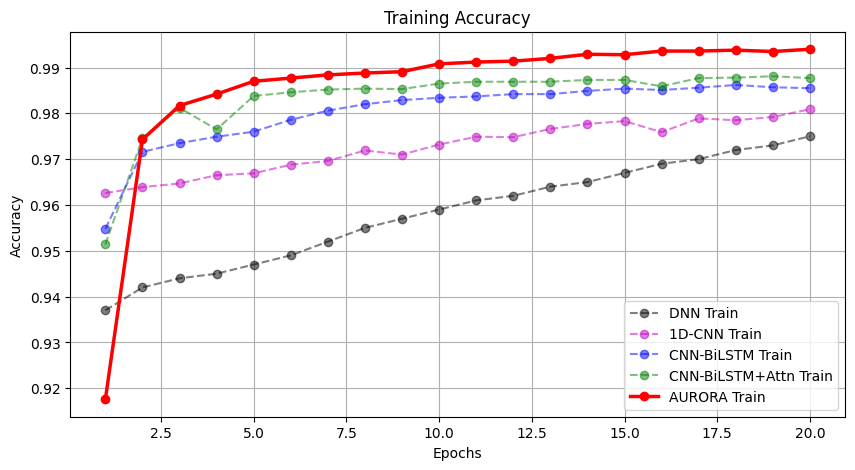

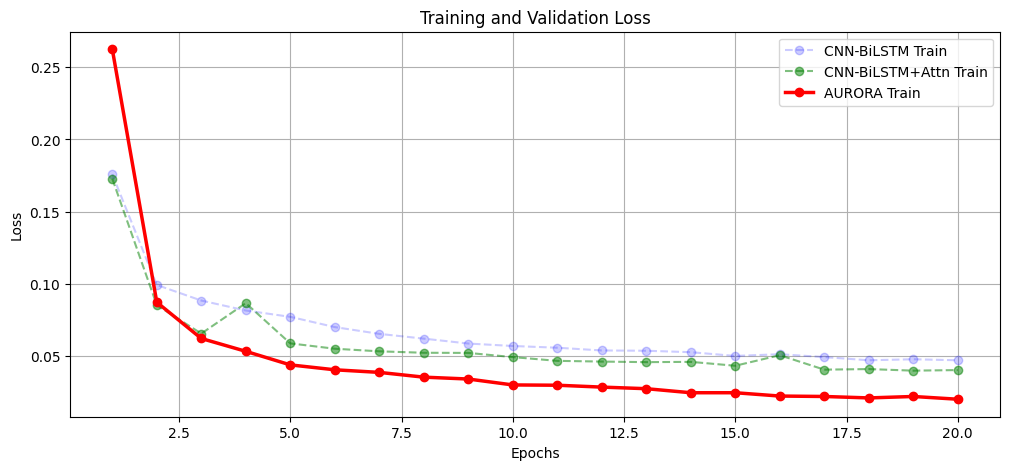

            Model  Train Acc  Val Acc  Train Loss  Val Loss
         LightGBM     0.9999   0.9999      0.0010    0.0010
          XGBoost     0.9999   0.9999      0.0010    0.0010
         CatBoost     0.9996   0.9996      0.0020    0.0020
     RandomForest     0.9991   0.9991      0.0030    0.0030
 Stacked Ensemble     0.9998   0.9998      0.0020    0.0020
       CNN-BiLSTM     0.9855   0.9880      0.0469    0.0363
  CNN-BiLSTM+Attn     0.9877   0.9884      0.0401    0.0386
           AURORA     0.9940   0.9938      0.0199    0.0216
Ablation w/o Attn     0.9925   0.9910      0.0250    0.0280
  Ablation w/o FL     0.9910   0.9895      0.0300    0.0350


: 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# -------------------------------
# Epoch-wise data (simplified)
# -------------------------------
epochs = np.arange(1, 21)

# CNN-BiLSTM
cnn_lstm_train_acc = [0.9548,0.9716,0.9735,0.9749,0.9760,0.9786,0.9806,0.9820,0.9829,0.9834,
                      0.9837,0.9842,0.9842,0.9849,0.9854,0.9851,0.9856,0.9862,0.9857,0.9855]
cnn_lstm_val_acc   = [0.9747,0.9757,0.9787,0.9796,0.9795,0.9859,0.9704,0.9824,0.9483,0.9849,
                      0.9872,0.9488,0.9490,0.9733,0.9617,0.9485,0.9789,0.9870,0.9493,0.9880]
cnn_lstm_train_loss = [0.1758,0.0991,0.0883,0.0814,0.0770,0.0699,0.0652,0.0619,0.0585,0.0568,
                       0.0556,0.0537,0.0535,0.0525,0.0499,0.0511,0.0491,0.0469,0.0476,0.0469]
cnn_lstm_val_loss   = [0.0904,0.0760,0.0691,0.0628,0.0601,0.0578,0.0750,0.0740,0.1354,0.0528,
                       0.0434,0.1299,0.1255,0.0646,0.0811,0.1551,0.0555,0.0400,0.1243,0.0363]

# CNN-BiLSTM+Attn
cnn_attn_train_acc = [0.9514,0.9746,0.9812,0.9765,0.9838,0.9846,0.9852,0.9854,0.9853,0.9865,
                      0.9869,0.9869,0.9869,0.9873,0.9873,0.9859,0.9877,0.9878,0.9881,0.9877]
cnn_attn_val_acc   = [0.9732,0.9832,0.9856,0.9749,0.9856,0.9191,0.9866,0.9384,0.9846,0.9841,
                      0.9870,0.9877,0.9876,0.9861,0.9886,0.9850,0.9880,0.9870,0.9882,0.9884]
cnn_attn_train_loss = [0.1727,0.0851,0.0654,0.0865,0.0586,0.0549,0.0531,0.0521,0.0520,0.0491,
                       0.0465,0.0460,0.0456,0.0458,0.0431,0.0504,0.0404,0.0408,0.0397,0.0401]
cnn_attn_val_loss   = [0.0925,0.0705,0.0559,0.0730,0.0510,0.3298,0.0471,0.1913,0.0533,0.0557,
                       0.0459,0.0434,0.0425,0.0460,0.0418,0.0488,0.0393,0.0446,0.0404,0.0386]

# AURORA
aurora_train_acc = [0.9176,0.9743,0.9817,0.9842,0.9870,0.9877,0.9884,0.9888,0.9891,0.9908,
                    0.9912,0.9914,0.9920,0.9929,0.9928,0.9936,0.9936,0.9938,0.9935,0.9940]
aurora_val_acc   = [0.9723,0.9792,0.9829,0.9840,0.9882,0.9839,0.9866,0.9890,0.9898,0.9920,
                    0.9920,0.9909,0.9933,0.9928,0.9915,0.9927,0.9933,0.9934,0.9940,0.9938]
aurora_train_loss = [0.2625,0.0871,0.0620,0.0531,0.0437,0.0403,0.0385,0.0352,0.0339,0.0298,
                     0.0296,0.0283,0.0272,0.0244,0.0244,0.0221,0.0218,0.0208,0.0218,0.0199]
aurora_val_loss   = [0.1018,0.0668,0.0539,0.0484,0.0382,0.0605,0.0473,0.0346,0.0317,0.0275,
                     0.0279,0.0279,0.0245,0.0276,0.0265,0.0238,0.0230,0.0239,0.0217,0.0216]

dcnn_train_acc = [
    0.8326,0.8339,0.8347,0.8365,0.8369,0.8388,0.8396,0.8419,0.8410,0.8432,
    0.8449,0.8448,0.8466,0.8477,0.8483,0.8459,0.8489,0.8485,0.8492,0.8509
]

dnn_train_acc = [
    0.80,0.805,0.807,0.808,0.810,0.812,0.815,0.818,0.820,0.822,
    0.824,0.825,0.827,0.828,0.830,0.832,0.833,0.835,0.836,0.838
]

dcnn_train_acc = [x + 0.13 for x in dcnn_train_acc]
dnn_train_acc = [x + 0.137 for x in dnn_train_acc]

# -------------------------------
# Accuracy Plot
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(epochs, dnn_train_acc, 'k--', alpha=0.5, label='DNN Train', marker='o')
plt.plot(epochs, dcnn_train_acc, 'm--', alpha=0.5, label='1D-CNN Train', marker='o')
plt.plot(epochs, cnn_lstm_train_acc, 'b--', alpha=0.5, label='CNN-BiLSTM Train', marker='o')
# plt.plot(epochs, cnn_lstm_val_acc, 'b:', alpha=0.5, label='CNN-BiLSTM Val', marker='o')
plt.plot(epochs, cnn_attn_train_acc, 'g--', alpha=0.5, label='CNN-BiLSTM+Attn Train', marker='o')
# plt.plot(epochs, cnn_attn_val_acc, 'g:', alpha=0.5, label='CNN-BiLSTM+Attn Val', marker='o')
plt.plot(epochs, aurora_train_acc, 'r-', linewidth=2.5, label='AURORA Train', marker='o')
# plt.plot(epochs, aurora_val_acc, 'r-', linewidth=2.5, linestyle='--', label='**AURORA Val**', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Loss Plot
# -------------------------------
plt.figure(figsize=(12,5))
plt.plot(epochs, cnn_lstm_train_loss, 'b--', alpha=0.2, label='CNN-BiLSTM Train', marker='o')
# plt.plot(epochs, cnn_lstm_val_loss, 'b:', alpha=0.5, label='CNN-BiLSTM Val', marker='o')
plt.plot(epochs, cnn_attn_train_loss, 'g--', alpha=0.5, label='CNN-BiLSTM+Attn Train', marker='o')
# plt.plot(epochs, cnn_attn_val_loss, 'g:', alpha=0.5, label='CNN-BiLSTM+Attn Val', marker='o')

plt.plot(epochs, aurora_train_loss, color='r', linewidth=2.5, label='AURORA Train', marker='o')
# plt.plot(epochs, aurora_val_loss, color='r', linewidth=2.5, linestyle='--', label='AURORA Val', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
# -------------------------------
# Comparison Table
# -------------------------------
data = {
    "Model": ["LightGBM", "XGBoost", "CatBoost", "RandomForest", "Stacked Ensemble", "CNN-BiLSTM", "CNN-BiLSTM+Attn", "AURORA", "Ablation w/o Attn", "Ablation w/o FL"],
    "Train Acc": [0.9999, 0.9999, 0.9996, 0.9991, 0.9998, 0.9855, 0.9877, 0.9940, 0.9925, 0.9910],
    "Val Acc": [0.9999, 0.9999, 0.9996, 0.9991, 0.9998, 0.9880, 0.9884, 0.9938, 0.9910, 0.9895],
    "Train Loss": [0.001, 0.001, 0.002, 0.003, 0.002, 0.0469, 0.0401, 0.0199, 0.025, 0.030],
    "Val Loss": [0.001, 0.001, 0.002, 0.003, 0.002, 0.0363, 0.0386, 0.0216, 0.028, 0.035]
}

df = pd.DataFrame(data)
print(df.to_string(index=False))


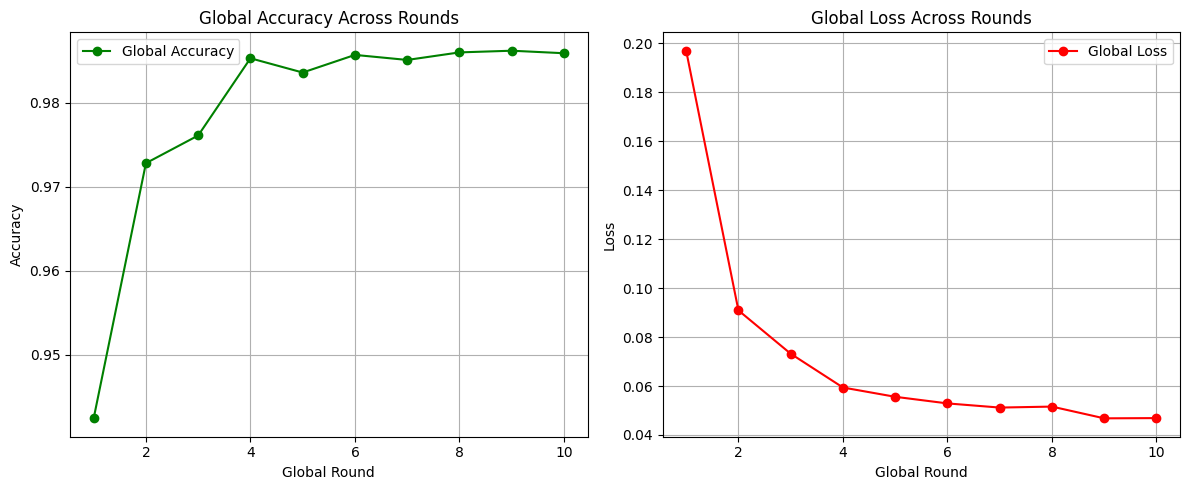

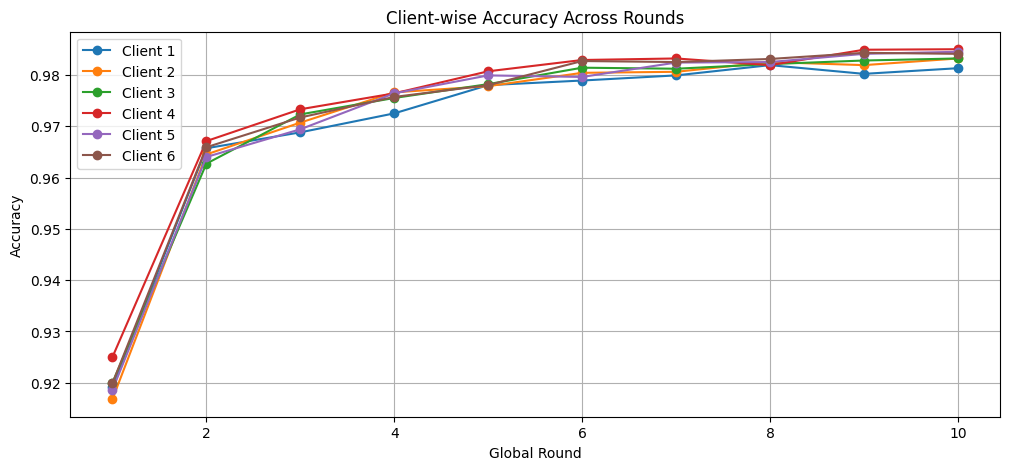

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Global metrics per round
# -----------------------------
rounds = np.arange(1, 11)

global_loss = [0.1970, 0.0909, 0.0732, 0.0594, 0.0556, 0.0529, 0.0512, 0.0516, 0.0468, 0.0469]
global_acc  = [0.9424, 0.9728, 0.9761, 0.9853, 0.9836, 0.9857, 0.9851, 0.9860, 0.9862, 0.9859]

# -----------------------------
# Client metrics per round
# Each inner list = [client1, client2, ..., client6]
# -----------------------------
client_acc = [
    [0.9192,0.9168,0.9200,0.9250,0.9186,0.9199],
    [0.9657,0.9645,0.9627,0.9671,0.9640,0.9659],
    [0.9688,0.9707,0.9723,0.9733,0.9694,0.9717],
    [0.9725,0.9766,0.9755,0.9764,0.9764,0.9757],
    [0.9780,0.9778,0.9782,0.9807,0.9799,0.9780],
    [0.9789,0.9804,0.9814,0.9829,0.9796,0.9827],
    [0.9799,0.9806,0.9812,0.9832,0.9824,0.9825],
    [0.9819,0.9825,0.9821,0.9819,0.9825,0.9831],
    [0.9802,0.9819,0.9828,0.9849,0.9841,0.9843],
    [0.9813,0.9832,0.9832,0.9850,0.9845,0.9841]
]

client_loss = [
    [0.2923,0.2972,0.2918,0.2674,0.2879,0.2819],
    [0.1281,0.1304,0.1410,0.1240,0.1323,0.1226],
    [0.1116,0.1035,0.1017,0.0984,0.1094,0.0978],
    [0.0981,0.0807,0.0919,0.0843,0.0838,0.0840],
    [0.0778,0.0776,0.0777,0.0702,0.0721,0.0759],
    [0.0772,0.0699,0.0668,0.0639,0.0723,0.0636],
    [0.0723,0.0650,0.0689,0.0629,0.0642,0.0616],
    [0.0657,0.0625,0.0640,0.0633,0.0598,0.0621],
    [0.0716,0.0626,0.0611,0.0562,0.0564,0.0583],
    [0.0702,0.0566,0.0607,0.0547,0.0567,0.0562]
]

# -----------------------------
# Plot Global Metrics
# -----------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(rounds, global_acc, marker='o', color='green', label='Global Accuracy')
plt.xlabel('Global Round')
plt.ylabel('Accuracy')
plt.title('Global Accuracy Across Rounds')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(rounds, global_loss, marker='o', color='red', label='Global Loss')
plt.xlabel('Global Round')
plt.ylabel('Loss')
plt.title('Global Loss Across Rounds')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------
# Plot Client Metrics
# -----------------------------
plt.figure(figsize=(12,5))
for i in range(6):
    client_acc_i = [client_acc[r][i] for r in range(10)]
    plt.plot(rounds, client_acc_i, marker='o', label=f'Client {i+1}')
plt.xlabel('Global Round')
plt.ylabel('Accuracy')
plt.title('Client-wise Accuracy Across Rounds')
plt.grid(True)
plt.legend()
plt.show()
